In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
data_path = 'survey lung cancer.csv'
lung_cancer_data = pd.read_csv(data_path)

# Display the first few rows of the dataset and its summary
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Data Preprocessing

In [8]:
#its summary
lung_cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [96]:
lung_cancer_data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
lung_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [14]:
lung_cancer_data.columns = lung_cancer_data.columns.str.strip()

In [13]:
print(lung_cancer_data.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


## Data Visualization

<Axes: xlabel='FATIGUE', ylabel='count'>

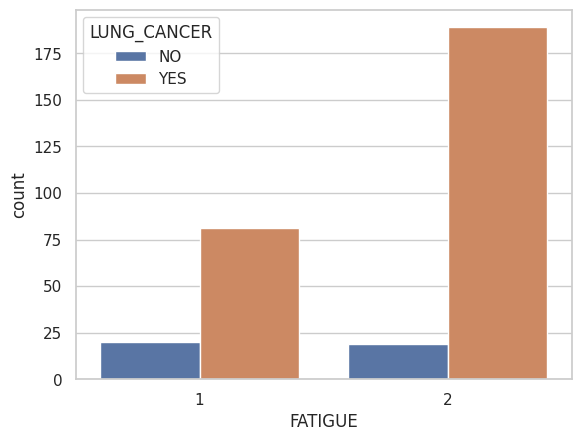

In [15]:
import seaborn as sns

# Ensure column names are correct
lung_cancer_data.columns = lung_cancer_data.columns.str.strip()

# Now try plotting
sns.countplot(data=lung_cancer_data, x='FATIGUE', hue='LUNG_CANCER')

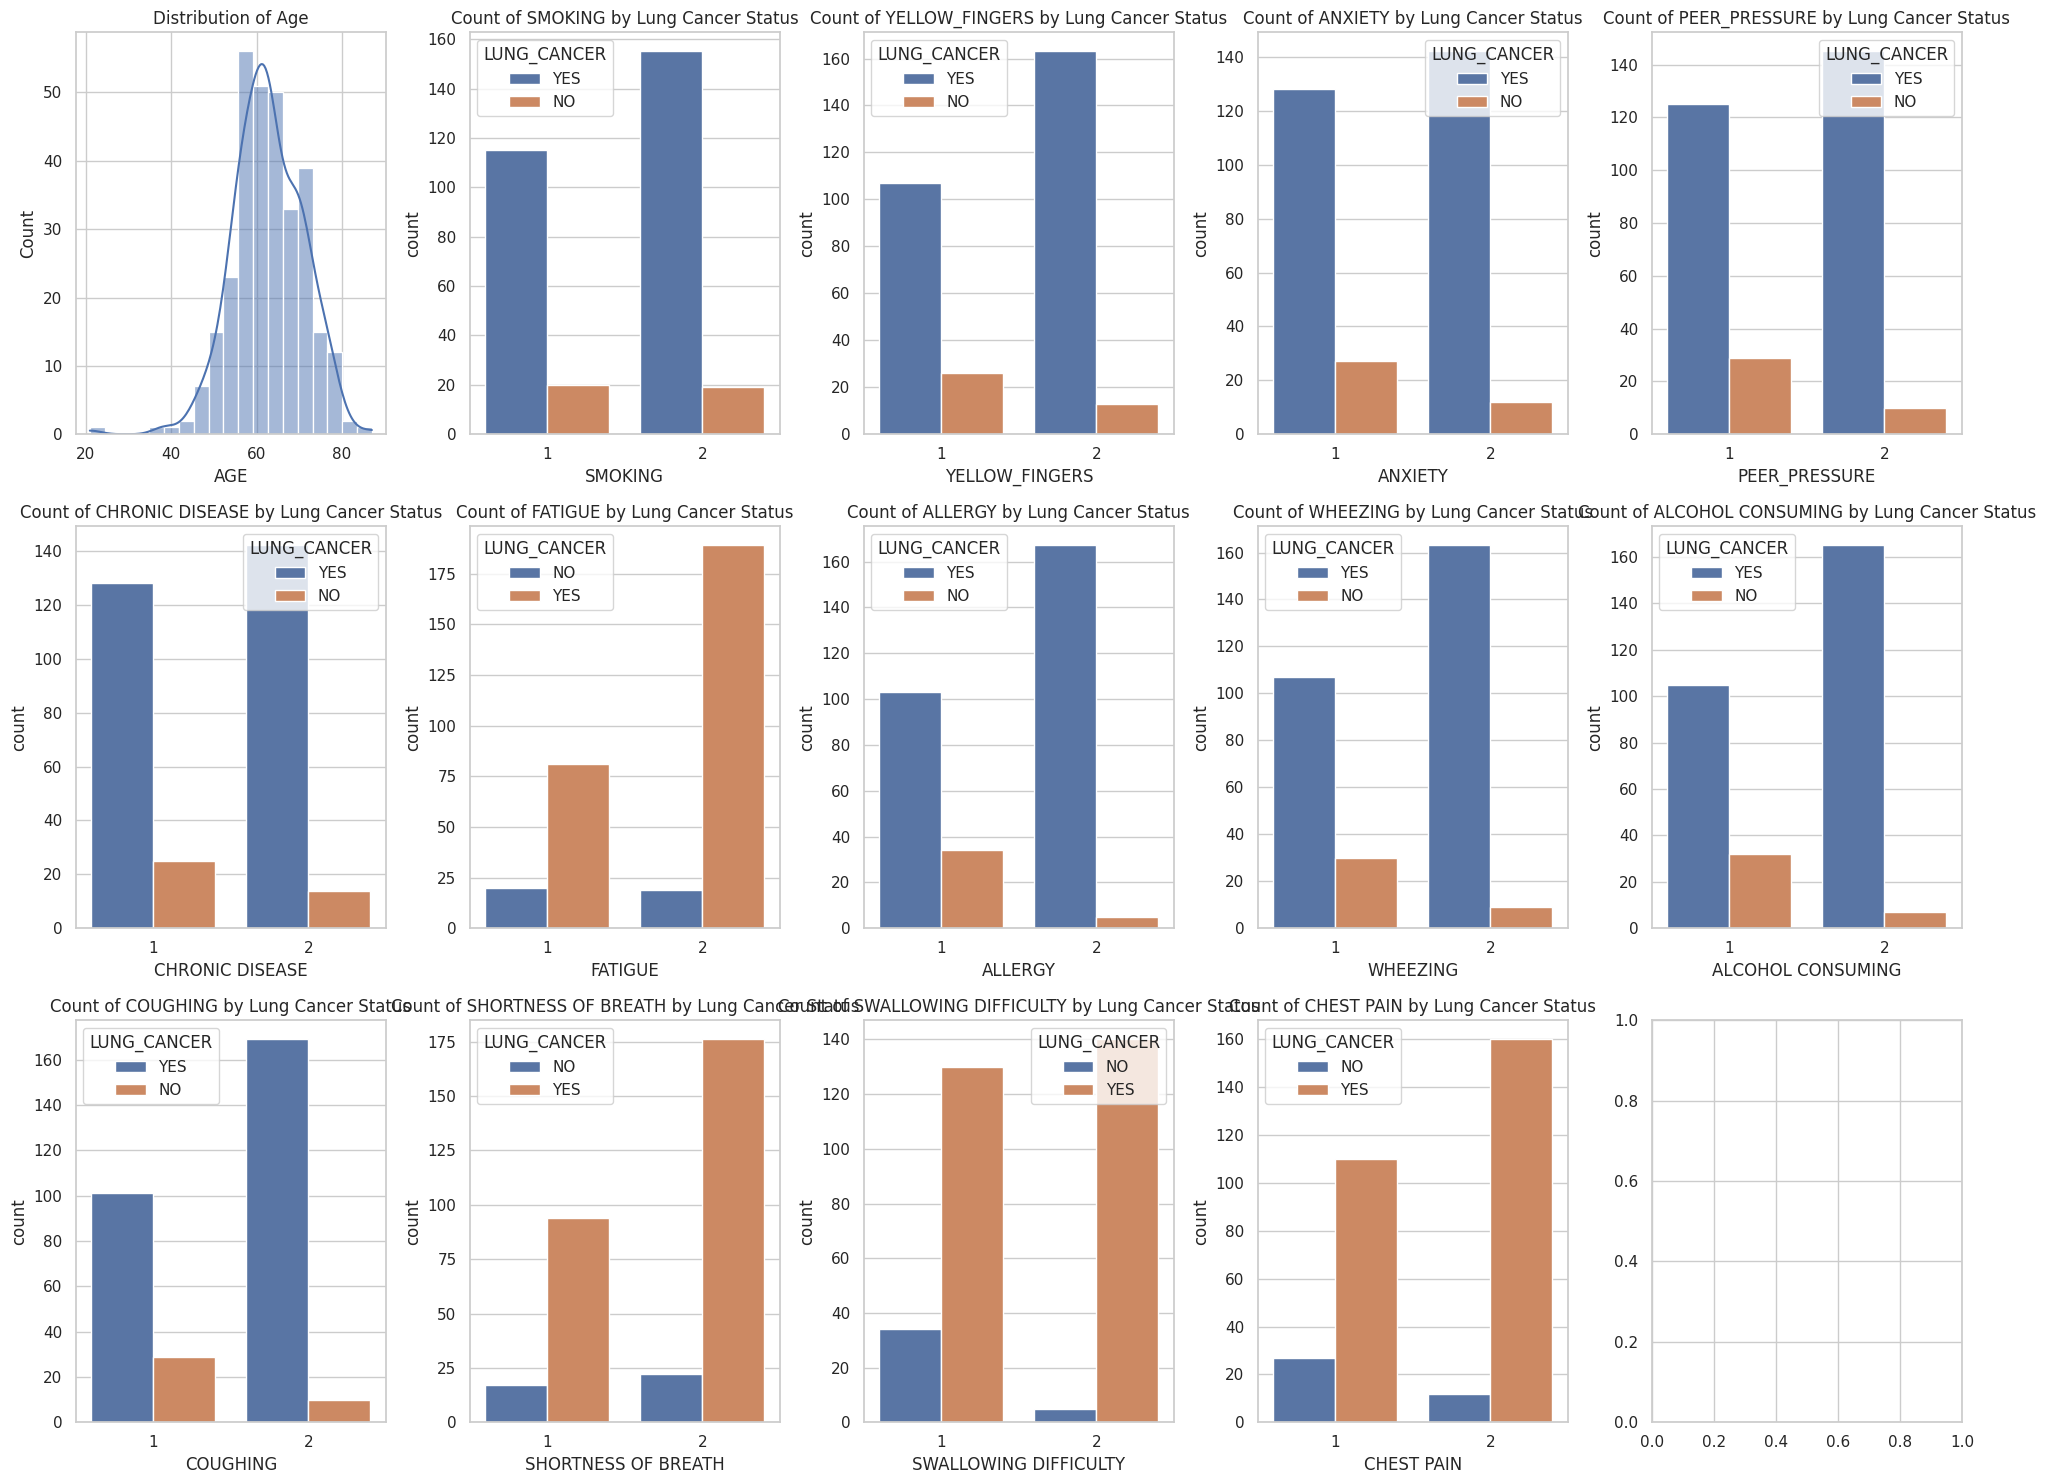

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to contain the plots
fig, axes = plt.subplots(3, 5, figsize=(20, 15))

# List of binary features
binary_features = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                   'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
                   'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Plotting distribution of age
sns.histplot(data=lung_cancer_data, x='AGE', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Age')

# Plotting count plots for binary features by LUNG_CANCER status
for i, feature in enumerate(binary_features):
    row = (i + 1) // 5
    col = (i + 1) % 5
    sns.countplot(data=lung_cancer_data, x=feature, hue='LUNG_CANCER', ax=axes[row, col])
    axes[row, col].set_title(f'Count of {feature} by Lung Cancer Status')

# Adjusting layout
plt.tight_layout()
plt.show()


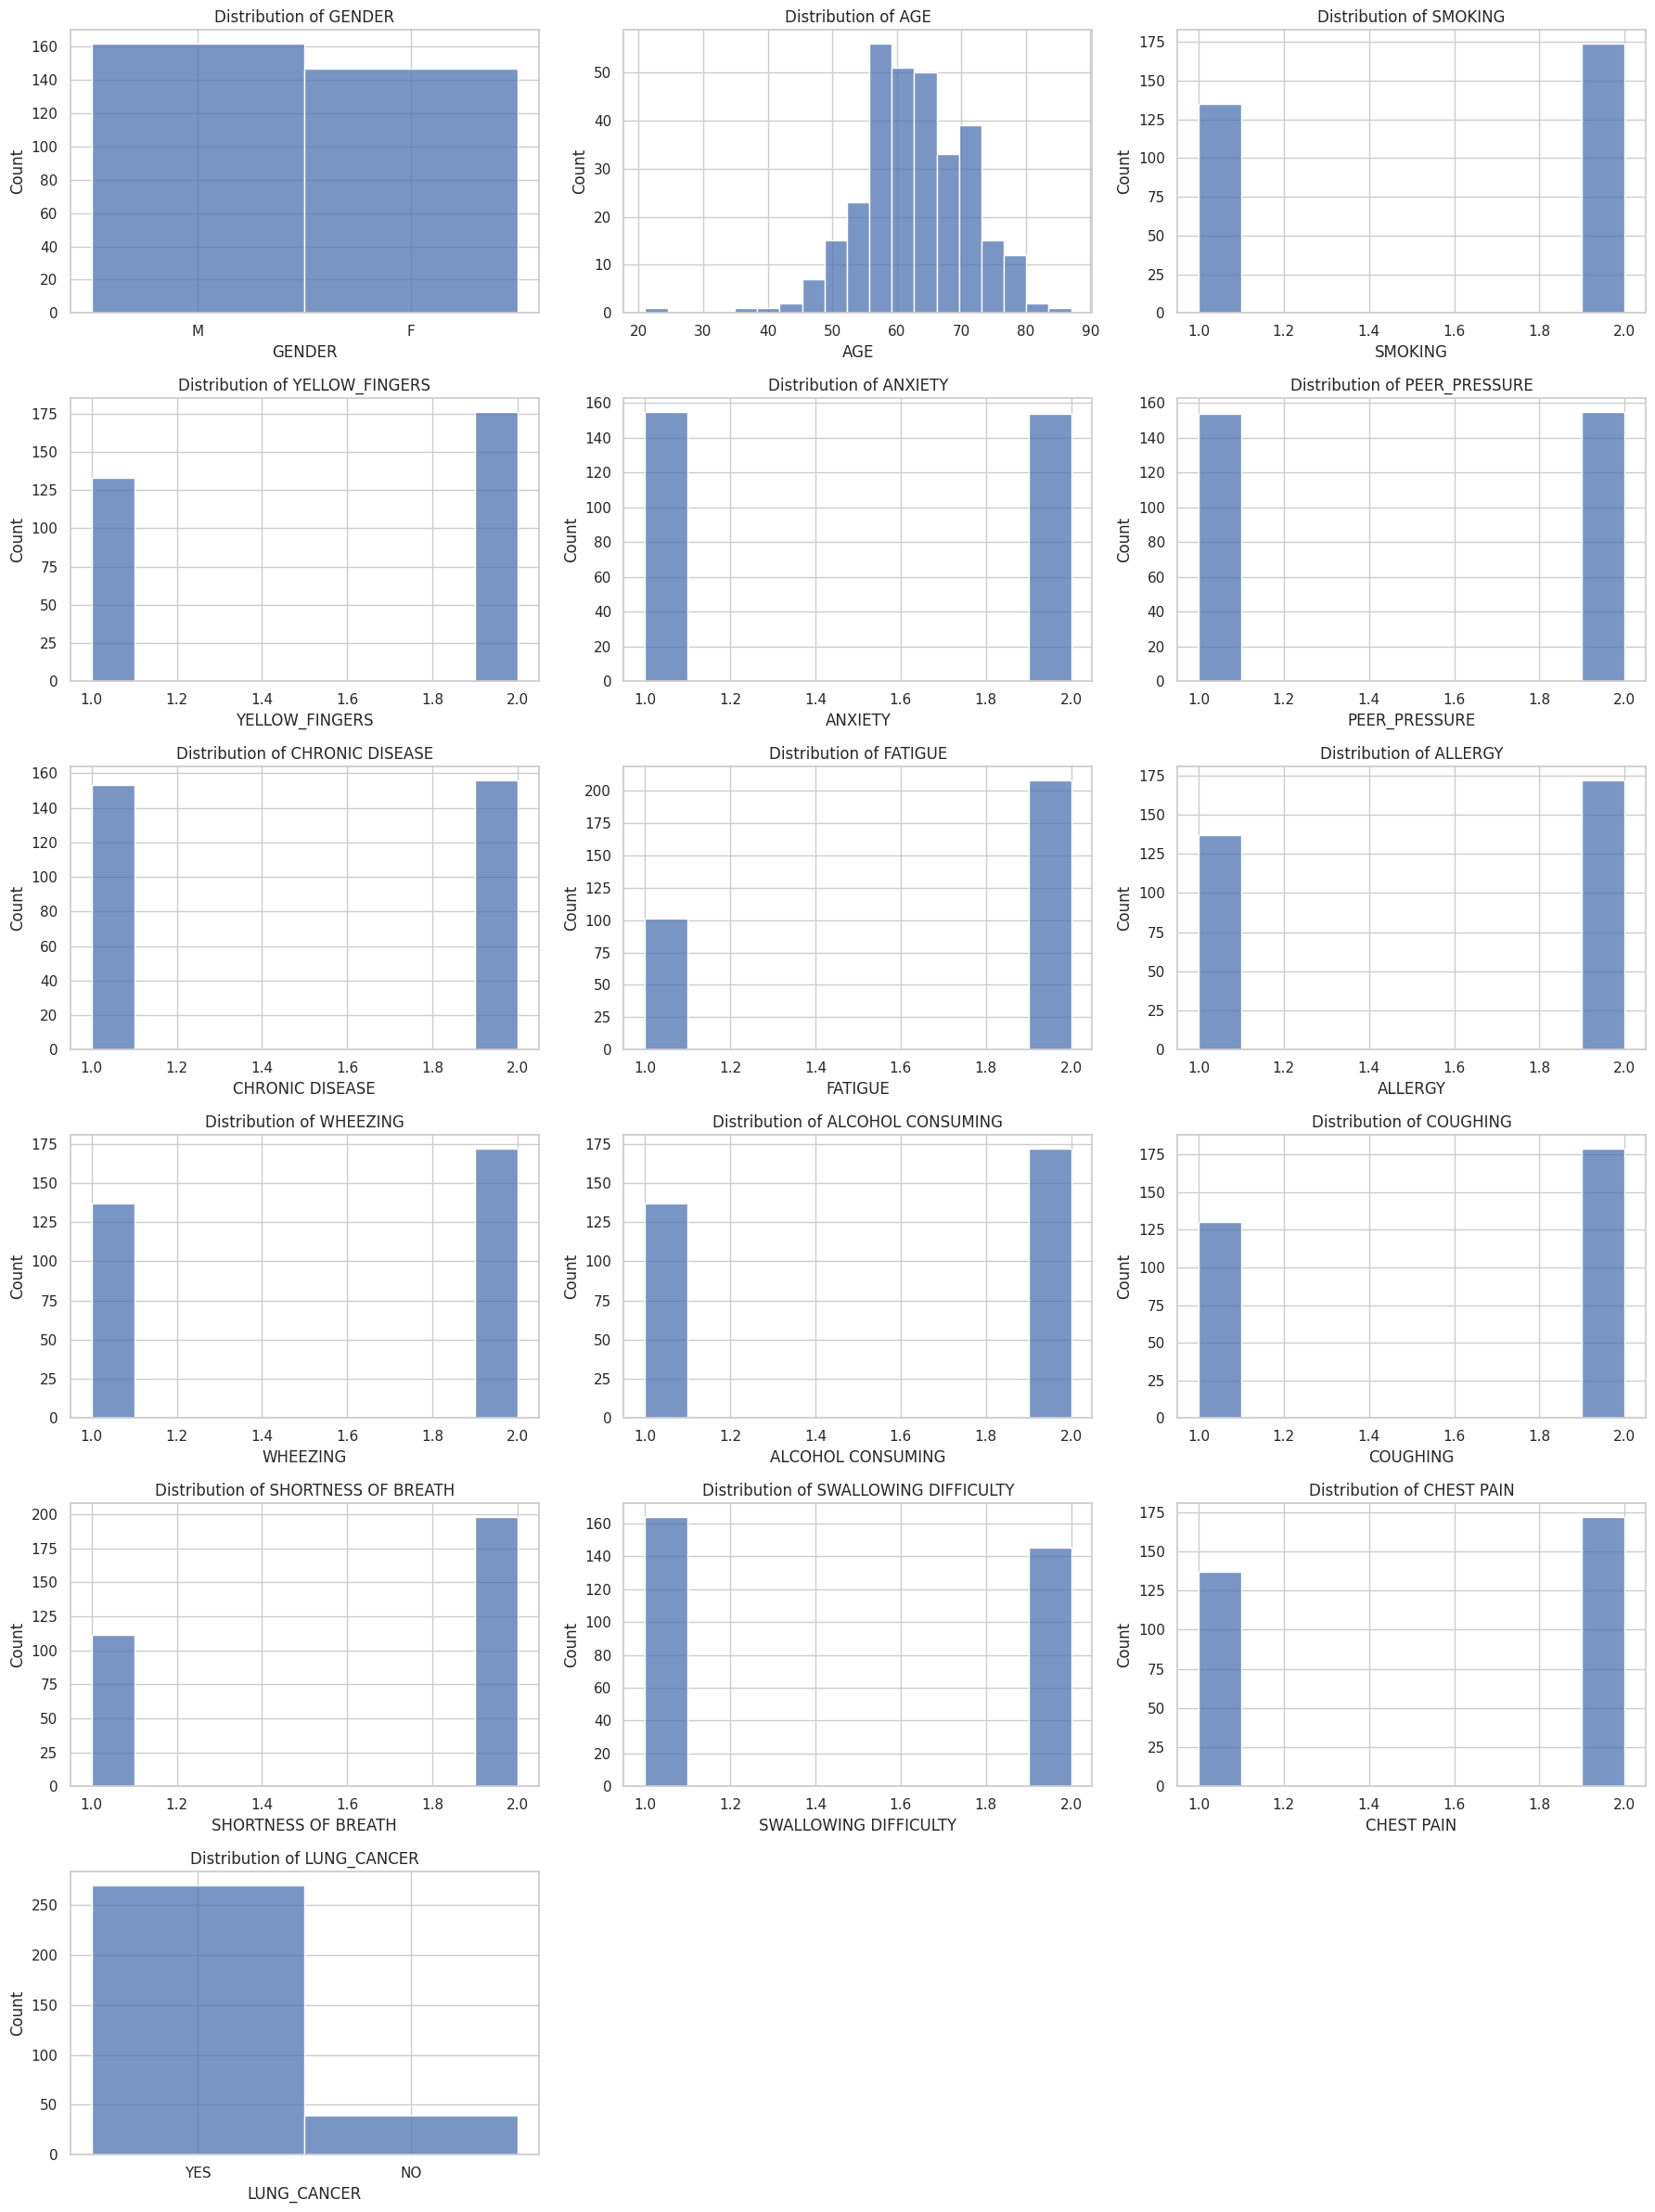

In [18]:
# Adjusting the number of rows and columns in the subplot grid to accommodate all columns
num_columns = len(lung_cancer_data.columns)
num_rows = (num_columns + 2) // 3  # Adding more rows to ensure all columns fit

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows*4))  # Adjusting figure size based on the number of rows
axes = axes.ravel()

for i, col in enumerate(lung_cancer_data.columns):
    sns.histplot(lung_cancer_data[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')

# Hide any unused subplots if the number of columns is less than the number of subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [30]:
# Applying the mapping correctly
lung_cancer_data['GENDER'] = lung_cancer_data['GENDER'].map({0: 1, 1: 2})
lung_cancer_data['LUNG_CANCER'] = lung_cancer_data['LUNG_CANCER'].map({0: 1, 1: 2})

# Display the first few rows to confirm changes
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,2


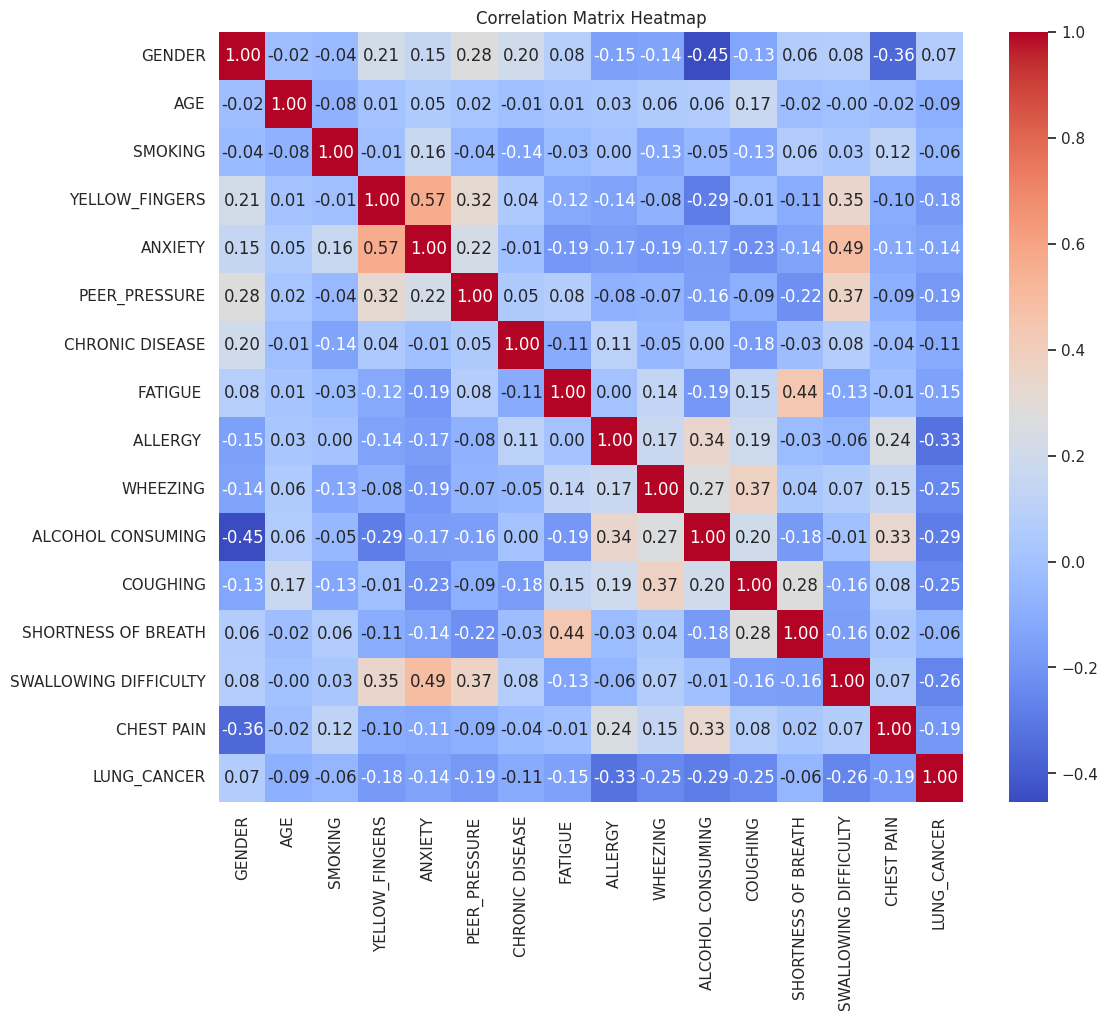

In [31]:
# Calculating the correlation matrix
correlation_matrix = lung_cancer_data.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [32]:
lung_cancer1 = lung_cancer_data.drop("AGE", axis=1)

lung_cancer1.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,1,1,1,2,1,2,1,2,1,2,2,1,2,2
3,1,2,2,2,1,1,1,1,1,2,1,1,2,2,2
4,2,1,2,1,1,1,1,1,2,1,2,2,1,1,2


<Axes: title={'center': 'Boxplot for all the columns'}>

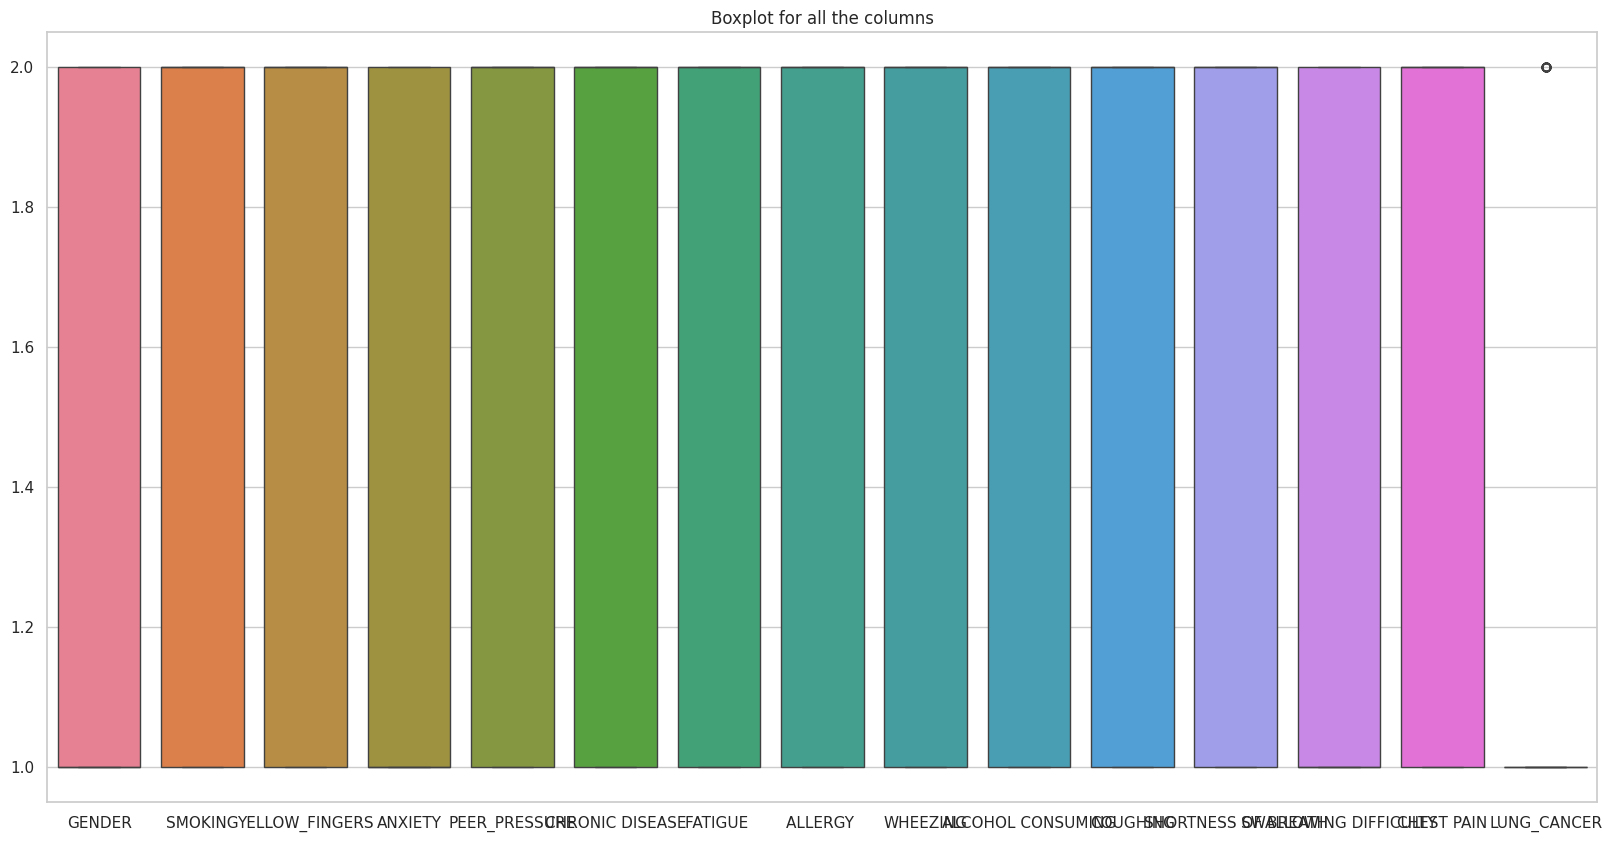

In [37]:
plt.figure(figsize=(20, 10))
plt.title('Boxplot for all the columns')
sns.boxplot(lung_cancer1, orient='v')

## Splitting Data

In [38]:
from sklearn.model_selection import train_test_split

# Assuming 'features' is your DataFrame with the input features and 'target' is your target column
X = lung_cancer_data.drop('LUNG_CANCER', axis=1)  # Dropping the target column to isolate features
y = lung_cancer_data['LUNG_CANCER']  # The target variable

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=30)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30)

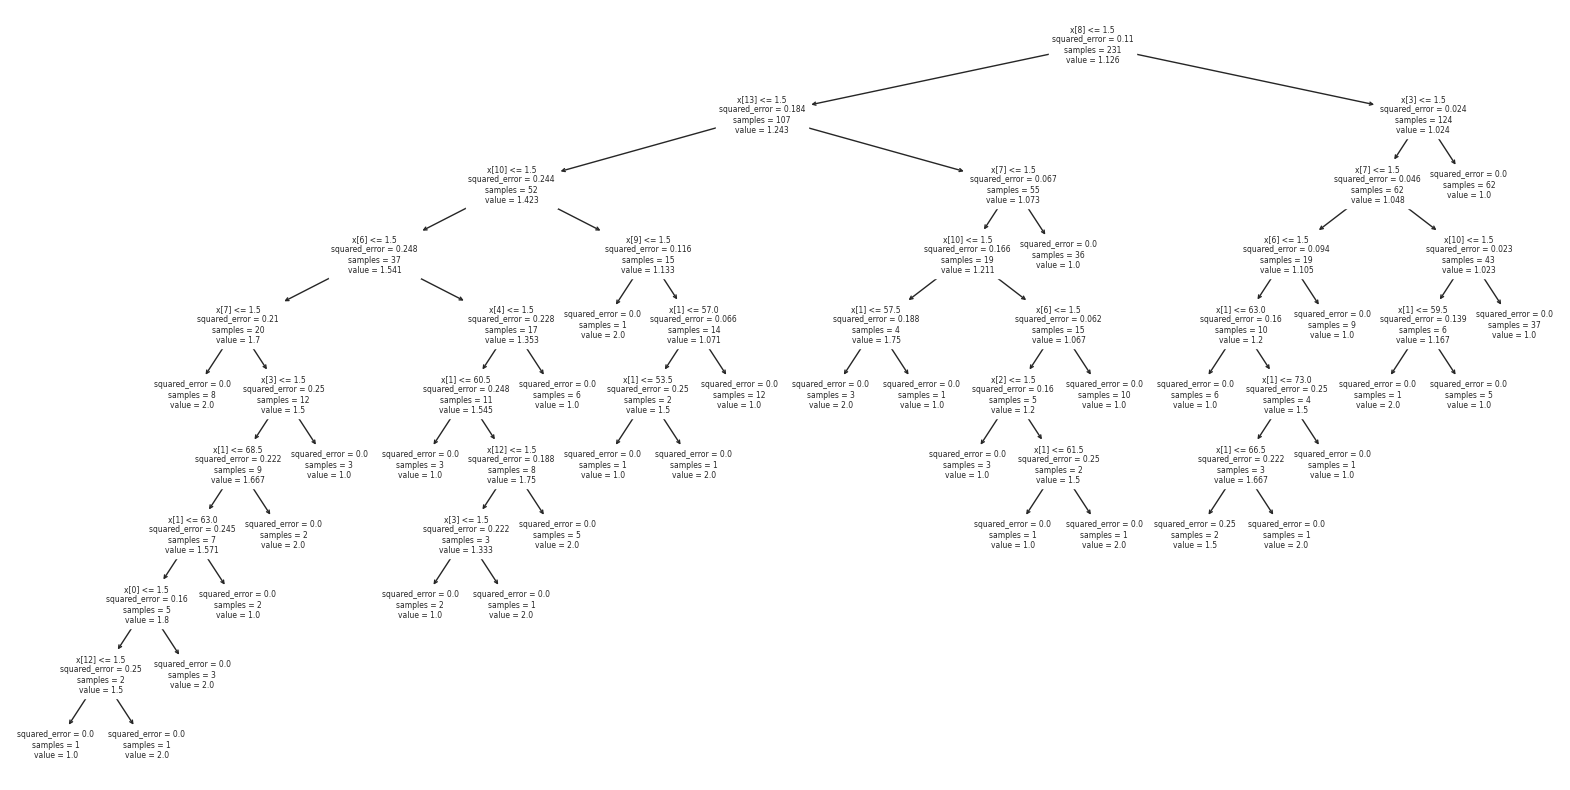

In [71]:
#ploting the decision tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model);

In [72]:
model.score(X_test,y_test)

0.08235294117647018

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the model
model = DecisionTreeRegressor()

# Setup the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)
print("Best model:", best_model)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best model: DecisionTreeRegressor(max_depth=30, min_samples_leaf=5)


## Random Forest

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor(random_state=0)

# Setup the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # More options for number of trees
    'max_features': [3, 5, 7, 'auto'],    # Various choices for max features
    'max_depth': [None, 10, 20, 30],       # Optional: max depth of the trees
    'min_samples_split': [2, 10, 20],     # Optional: minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10]        # Optional: minimum number of samples required to be at a leaf node
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)
print("Best model:", best_model)


Fitting 10 folds for each of 576 candidates, totalling 5760 fits
Best parameters found:  {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best model: RandomForestRegressor(max_features=3, random_state=0)


In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)

model = RandomForestRegressor(n_estimators = num_trees, max_features = max_features, random_state=0)

In [77]:
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.26919194404657765


## Artificial Neural Network

In [79]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# 5. Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.3f}, Test MAE: {mae:.3f}")

Test Loss: 0.114, Test MAE: 0.193


In [80]:
def custom_accuracy(y_true, y_pred):
    threshold = 0.1  # Define your tolerance (this is an example)
    is_close = tf.less_equal(tf.abs(y_true - y_pred), threshold)
    return tf.reduce_mean(tf.cast(is_close, tf.float32))


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 3. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[custom_accuracy])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# 5. Evaluate the model
loss, custom_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.3f}, Test Custom Accuracy: {custom_acc:.3f}")

Epoch 1/100
6/6 [==============================] - 2s 72ms/step - loss: 50.3785 - custom_accuracy: 0.0000e+00 - val_loss: 5.3065 - val_custom_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 2.1008 - custom_accuracy: 0.0521 - val_loss: 6.1249 - val_custom_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 8.2020 - custom_accuracy: 0.0000e+00 - val_loss: 6.4567 - val_custom_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 3.2972 - custom_accuracy: 0.0260 - val_loss: 0.2001 - val_custom_accuracy: 0.1312
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 0.7280 - custom_accuracy: 0.0885 - val_loss: 1.7188 - val_custom_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 1.6121 - custom_accuracy: 0.0000e+00 - val_loss: 0.6816 - val_custom_accuracy: 0.0156
Epoch 7/100
6/6 [==============================

In [81]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.3f}")

Test Accuracy: 0.183


## K Nearest Neighbours

In [90]:
from sklearn.model_selection import GridSearchCV

n_neighbors = np.array(range(1,45))
param_grid = dict(n_neighbors = n_neighbors)

In [91]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])})

In [92]:
print(grid.best_score_)
print(grid.best_params_)

0.8965626652564781
{'n_neighbors': 1}


In [93]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=15)

model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, y, cv=kfold)

In [94]:
results

array([0.80952381, 0.71428571, 0.95238095, 0.95238095, 0.95238095,
       0.9047619 , 1.        , 0.9047619 , 0.80952381, 0.75      ,
       1.        , 1.        , 0.85      , 0.8       , 1.        ])

In [95]:
print(results.mean())

0.8933333333333333


## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred_test = model.predict(X_test)
y_pred_test


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
model.score(X_train, y_train)

0.9307359307359307

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
print(confusion_matrix)

[[67  1]
 [ 5  5]]


<Axes: title={'center': 'confusion_matrix'}>

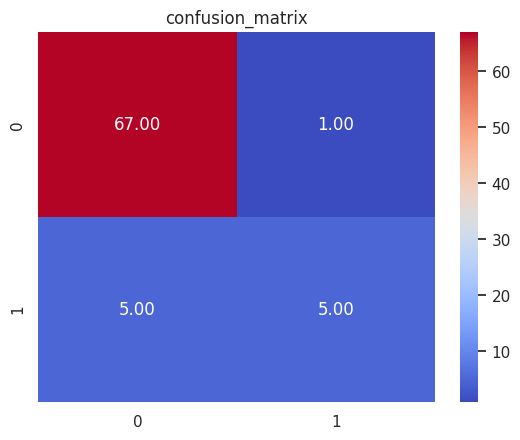

In [97]:
plt.title('confusion_matrix')
sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

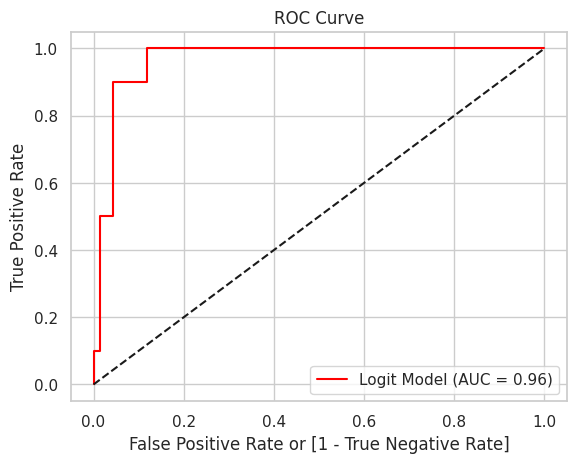

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test is currently 1 and 2, convert it to 0 and 1
y_test_adjusted = y_test - 1

# Recalculate ROC curve with adjusted labels
fpr, tpr, thresholds = roc_curve(y_test_adjusted, model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test_adjusted, model.predict_proba(X_test)[:, 1])

# Plotting the ROC curve
plt.plot(fpr, tpr, color='red', label=f'Logit Model (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96        68
           2       0.83      0.50      0.62        10

    accuracy                           0.92        78
   macro avg       0.88      0.74      0.79        78
weighted avg       0.92      0.92      0.91        78



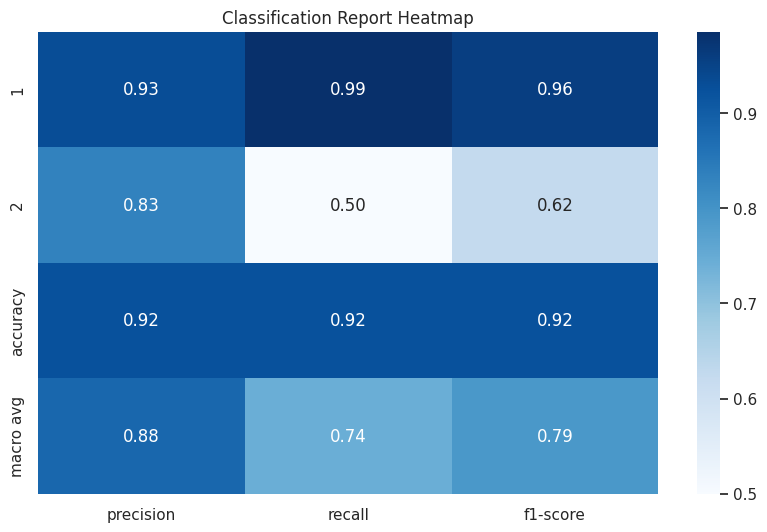

In [85]:
# Get the classification report as a dictionary
report = classification_report(y_test, y_pred_test, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap of the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].drop(['support'], axis=1), annot=True, cmap="Blues", fmt=".2f")
plt.title('Classification Report Heatmap')
plt.show()